# Deep Q Network (DQN)

$Q_{s,a} \Leftarrow  R_{s,a} + \gamma . max\left(Q_{s', a^*}\right)$

$Q_{s,a}$ should be equal the immediate reward ($R_{s,a}$) plus the best reward of the future state ($max\left(Q_{s', a^*}\right)$)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import gym
import numpy as np
import random
import tensorflow as tf
env = gym.make('FrozenLake-v0')
alpha=0.05
beta = 0.8
gamma = .95
num_episodes = 1000

[2017-10-27 16:59:50,736] Making new env: FrozenLake-v0


In [2]:
#Forward
tf.reset_default_graph()
tf_s = tf.placeholder(shape=[1,16],dtype=tf.float32)
tf_W = tf.Variable(tf.random_uniform([16,4],0,0.01))
tf_b = tf.Variable(tf.random_uniform([1,4],0,0.01))
tf_Q = tf.add(tf.matmul(tf_s,tf_W),tf_b)
tf_a = tf.argmax(tf_Q,1)

#Backward
tf_Qn = tf.placeholder(shape=[1,4],dtype=tf.float32)
Error = tf.reduce_sum(tf.square(tf_Qn - tf_Q))
train= tf.train.GradientDescentOptimizer(learning_rate=alpha).minimize(Error)

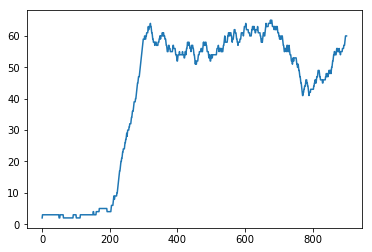

In [3]:
init = tf.global_variables_initializer()

reward_list=[]
with tf.Session() as sess:
    sess.run(init)
    for i in range(num_episodes):
        s = env.reset()
        done = False
        while done==False:
            a,allQ = sess.run([tf_a,tf_Q],feed_dict={tf_s:np.identity(16)[s:s+1]})
            if np.random.rand(1) < beta:
                a[0] = env.action_space.sample()
            #take action
            s1,reward,done,info = env.step(a[0])
            if done:#reaching goal or falling into a hole
                if reward:
                    beta=beta*0.8
                    r=1
                else:
                    r=-1
            else:#reaching maximum step
                r = 0.0
            #obtian Q of the next step
            Q_next= sess.run(tf_Q,feed_dict={tf_s:np.identity(16)[s1:s1+1]})
            #find the best reward
            allQ[0,a[0]] = r + gamma*np.max(Q_next)
            sess.run([train],feed_dict={tf_s:np.identity(16)[s:s+1],tf_Qn:allQ})
            s = s1
            if done == True:
                break
        reward_list.append(reward)
    W,b=sess.run([tf_W,tf_b])
plt.plot(np.convolve(np.ones(100),reward_list,"valid"))

In [4]:
np.identity(16)[[2]]

array([[ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.]])

In [5]:
a=np.random.randint(10,size=(3,3))

In [6]:
a

array([[6, 6, 7],
       [2, 8, 0],
       [6, 4, 6]])

In [7]:
a.T[[1]]

array([[6, 8, 4]])